Binary / Multiclass / Multilabel Classification

In [ ]:
# Create own data and fit

from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.3, random_state=100)


In [ ]:
# Check features
X

array([[-1.00460913,  0.12171084],
       [ 0.5528969 , -1.51682573],
       [ 0.71070148,  0.56706941],
       ...,
       [-0.01678049, -1.02927101],
       [-0.68706981, -0.37074468],
       [ 0.49910058,  0.51259143]])

In [ ]:
# Check labels
y[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
# visualize data
import pandas as pd

circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-1.004609,0.121711,0
1,0.552897,-1.516826,0
2,0.710701,0.567069,1
3,0.833531,-0.541642,0
4,0.629593,0.465277,1
...,...,...,...
995,-0.161022,-0.864376,1
996,-0.316317,-1.280797,1
997,-0.016780,-1.029271,1
998,-0.687070,-0.370745,1


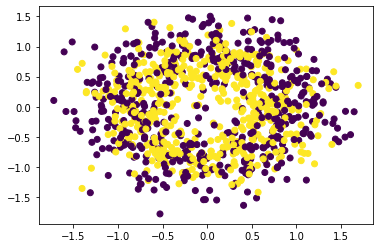

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
# check shape
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# len
len(X), len(y)

(1000, 1000)

In [ ]:
# check few samples
X[0], y[0]

(array([-1.00460913,  0.12171084]), 0)

In [ ]:
X[25], y[25]

(array([-0.04469697,  0.52500869]), 1)

In [ ]:
# Create Classification Model
import tensorflow as tf

# set seed
tf.random.set_seed(100)

In [ ]:
# Create model
clf_model_1 = tf.keras.Sequential()
clf_model_1.add(tf.keras.layers.Dense(1))

# Compile model
clf_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["accuracy"])

# Fit model
clf_model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.6891 - accuracy: 0.5070
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.9413 - accuracy: 0.5370
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 7.3873 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 7.8523 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 7.8542 - accuracy: 0.4690


In [ ]:
# try and improve model by training longer epochs
clf_model_1.fit(X, y, epochs=200, verbose=0)
clf_model_1.evaluate(X, y)

32/32 [==============================] - 0s 998us/step - loss: 7.7964 - accuracy: 0.4730


[7.796403408050537, 0.4729999899864197]

In [ ]:
# let try adding additional layer to improve accuracy

# set seed
tf.random.set_seed(100)

# Create model
clf_model_2 = tf.keras.Sequential()
clf_model_2.add(tf.keras.layers.Dense(1))
clf_model_2.add(tf.keras.layers.Dense(1))

# Compile model
clf_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["accuracy"])

# Fit model
clf_model_2.fit(X, y, epochs=200, verbose=0)

# Evaluate model
clf_model_2.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4730


[0.6931090354919434, 0.4729999899864197]

In [ ]:
# Improve the Model

# set seed
tf.random.set_seed(100)

# Create model
clf_model_3 = tf.keras.Sequential()
clf_model_3.add(tf.keras.layers.Dense(100))
clf_model_3.add(tf.keras.layers.Dense(10))
clf_model_3.add(tf.keras.layers.Dense(1))

# Compile model
clf_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Fit model
clf_model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate model
clf_model_3.evaluate(X, y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5250


[0.6954878568649292, 0.5249999761581421]

In [ ]:
import numpy as np

In [ ]:
# plot decision boundary

def plot_decision_boundary(model, X, y):
  # define axis boundaries and crete meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X value 
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # reshape prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot
  plt.contourf(xx, yy, y_pred, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


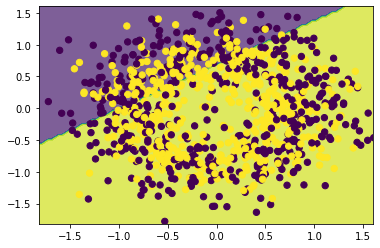

In [ ]:
# check out predictions
plot_decision_boundary(clf_model_3, X=X, y=y)


In [ ]:
# lets try with regression data

# create regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# split data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# we can't fit the existing model as it was compiled for Binary Classification, lets now create one for regression

In [ ]:
# set seed
tf.random.set_seed(100)

# create model
clf_model_4 = tf.keras.Sequential()
clf_model_4.add(tf.keras.layers.Dense(100))
clf_model_4.add(tf.keras.layers.Dense(10))
clf_model_4.add(tf.keras.layers.Dense(1))

# compile model
clf_model_4.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

# fit model
clf_model_4.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 334.2682 - mae: 334.2682
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 217.6434 - mae: 217.6434
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 101.9919 - mae: 101.9919
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 59.1174 - mae: 59.1174
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 83.0997 - mae: 83.0997
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 63.1561 - mae: 63.1561
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 44.5498 - mae: 44.5498
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.3680 - mae: 50.3680
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.1782 - mae: 42.1782
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 44.6683 - mae: 44.6683
Epoch 11/100
5/5 [==============================] - 0

In [ ]:
# make predictions
y_reg_pred = clf_model_4.predict(X_reg_test)


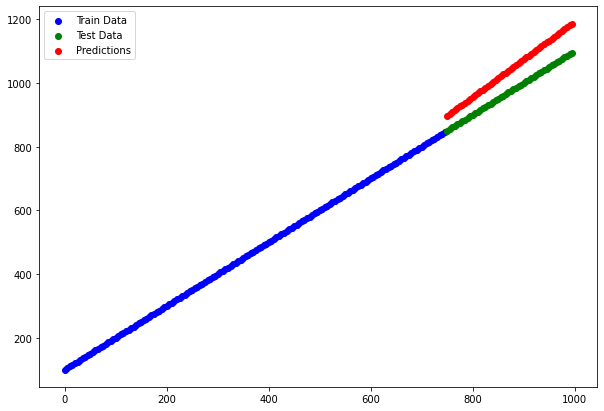

In [ ]:
# plot predictions
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Train Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend();


In [ ]:
# Non-linearity

In [ ]:
# set seed
tf.random.set_seed(100)

# create model
clf_model_5 = tf.keras.Sequential()
clf_model_5.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))

# compile model
clf_model_5.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])

# fit model
clf_model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3903 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3685 - accuracy: 0.4610
Epoch 3/100
32/32 [==============================] - 0s 982us/step - loss: 4.3507 - accuracy: 0.4620
Epoch 4/100
32/32 [==============================] - 0s 988us/step - loss: 4.3002 - accuracy: 0.4610
Epoch 5/100
32/32 [==============================] - 0s 976us/step - loss: 4.2554 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 997us/step - loss: 4.2308 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2026 - accuracy: 0.4600
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1987 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1731 - accuracy: 0.4610
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1667 - accuracy: 0.4640
E

doing binary classification


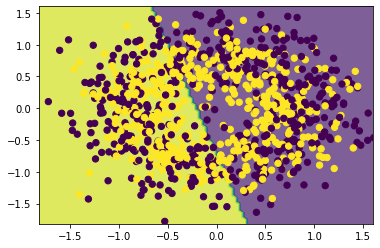

In [ ]:
# check decision bounday
plot_decision_boundary(clf_model_5, X=X, y=y)

In [ ]:
# Model with Non-Linear activation function

# set seed
tf.random.set_seed(100)

# create model
clf_model_6 = tf.keras.Sequential()
clf_model_6.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.relu))

# compile model
clf_model_6.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])

# fit model
history_6 = clf_model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3903 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3685 - accuracy: 0.4610
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3507 - accuracy: 0.4620
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3002 - accuracy: 0.4610
Epoch 5/100
32/32 [==============================] - 0s 977us/step - loss: 4.2554 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2308 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2026 - accuracy: 0.4600
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1987 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1731 - accuracy: 0.4610
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1667 - accuracy: 0.4640
Epoch 1

In [ ]:
# Model with Non-Linear activation function

# set seed
tf.random.set_seed(100)

# create model
clf_model_7 = tf.keras.Sequential()
clf_model_7.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_7.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_7.add(tf.keras.layers.Dense(1))

# compile model
clf_model_7.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])

# fit model
history_7 = clf_model_7.fit(X, y, epochs=250)


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# evaluate model
clf_model_7.evaluate(X, y)

32/32 [==============================] - 0s 939us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474822998047, 0.5]

doing binary classification


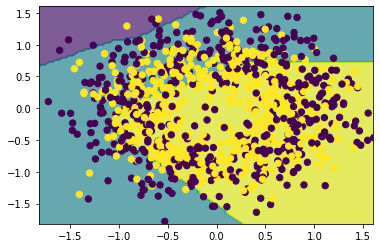

In [ ]:
# plot
plot_decision_boundary(clf_model_7, X=X, y=y)

In [ ]:
# Model with Non-Linear activation function

# set seed
tf.random.set_seed(100)

# create model
clf_model_8 = tf.keras.Sequential()
clf_model_8.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_8.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
clf_model_8.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])

# fit model
history_8 = clf_model_8.fit(X, y, epochs=250)


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5220
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5350
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5430
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5500
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.5530
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5590
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5590
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5700
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5660
Epoch 11/

In [ ]:
# evaluate model
clf_model_8.evaluate(X, y)


32/32 [==============================] - 0s 955us/step - loss: 0.6445 - accuracy: 0.6190


[0.6445483565330505, 0.6190000176429749]

doing binary classification


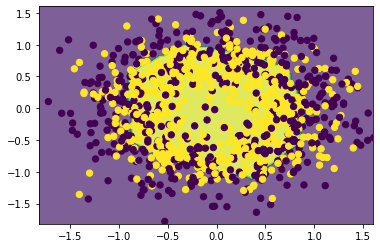

In [ ]:
# plot
plot_decision_boundary(clf_model_8, X=X, y=y)

In [ ]:
len(X)

1000

In [ ]:
# Split X and y
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Re-create model to fit on Train data and Evaluate on Test data

# set seed
tf.random.set_seed(100)

# create model
clf_model_9 = tf.keras.Sequential()
clf_model_9.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_9.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_9.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
clf_model_9.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["accuracy"])

# fit model
history_9 = clf_model_9.fit(X_train, y_train, epochs=50)


Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5387
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5900
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5950
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6125
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6075
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6112
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.5975
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6025
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6162
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5913
Epoch 11/50
25/25 [

In [ ]:
# Evaluate model on test set
clf_model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6050


[0.6641885638237, 0.6050000190734863]

doing binary classification
doing binary classification


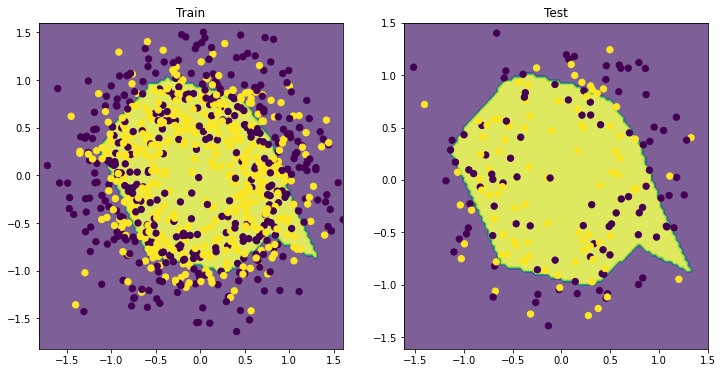

In [ ]:
# plot decision boundary on train and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(clf_model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(clf_model_9, X=X_test, y=y_test)
plt.show()

In [ ]:
# Plot Loss curver

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history_9.history)

,loss,accuracy
0,0.687574,0.53875
1,0.678500,0.59000
2,0.675480,0.59500
3,0.670763,0.61250
4,0.669291,0.60750
5,0.666471,0.61125
6,0.667157,0.59750
7,0.666995,0.60250
8,0.663817,0.61625
9,0.663547,0.59125


Text(0.5, 1.0, 'Model_9 Loss curver')

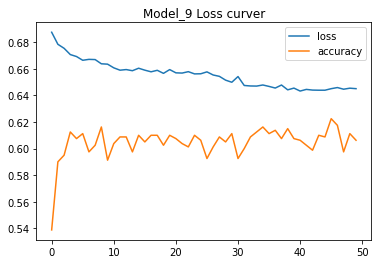

In [ ]:
# plot
pd.DataFrame(history_9.history).plot()
plt.title("Model_9 Loss curver")

In [ ]:
# Find best learning rate
# - Callback
# - Another Model
# - Modified loss curve plot

In [ ]:
# set seed
tf.random.set_seed(100)

# cretae model
clf_model_10 = tf.keras.Sequential()
clf_model_10.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_10.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_10.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
clf_model_10.compile(loss="binary_crossentropy",
                     optimizer="Adam",
                     metrics=["accuracy"])

# create learning rate callback
lr_scheduler =  tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit model with lr_scheduler
history_10 = clf_model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7107 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7091 - accuracy: 0.4925
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.4938
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.4900
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.4963
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5050
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5200
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5263
Epoch 11/

In [ ]:
# evaluate model
clf_model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.4412 - accuracy: 0.5200


[1.4412264823913574, 0.5199999809265137]

In [ ]:
# check history_10

pd.DataFrame(history_10.history)

,loss,accuracy,lr
0,0.712315,0.49500,0.000100
1,0.710730,0.49750,0.000112
2,0.709083,0.49250,0.000126
3,0.707326,0.49500,0.000141
4,0.705452,0.49375,0.000158
...,...,...,...
95,0.858181,0.49000,5.623413
96,0.891532,0.47000,6.309574
97,1.067005,0.53750,7.079458
98,0.743583,0.46000,7.943282


Text(0.5, 1.0, 'Model_10 Loss curver')

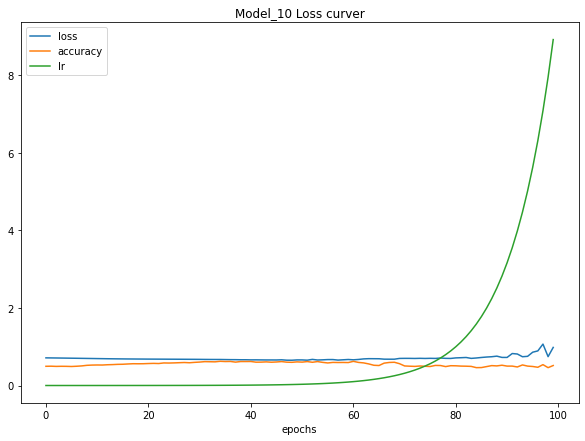

In [ ]:
# plot
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")
plt.title("Model_10 Loss curver")

Text(0.5, 1.0, 'Learning Rate verses Loss')

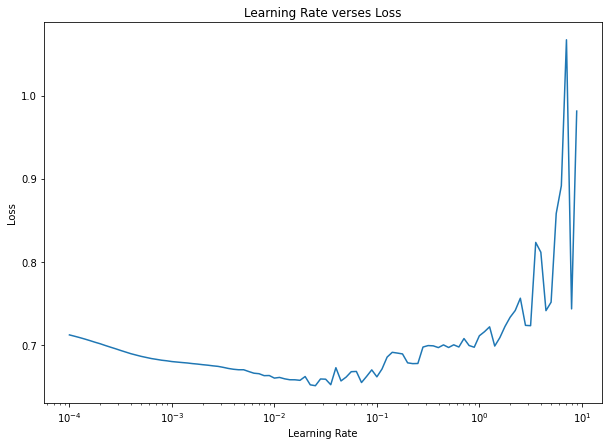

In [ ]:
# plot learing rate vesus loss

lrs = 1e-4 * (10**(tf.range(100)/20))

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate verses Loss")

In [ ]:
# Lets try with higher learning rate on same model

In [ ]:
# set seed
tf.random.set_seed(100)

# cretae model
clf_model_11 = tf.keras.Sequential()
clf_model_11.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_11.add(tf.keras.layers.Dense(4, activation="relu"))
clf_model_11.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# compile model
clf_model_11.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                     metrics=["accuracy"])

# create learning rate callback
#lr_scheduler =  tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit model with lr_scheduler
history_11 = clf_model_11.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5650
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.5850
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5913
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6112
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.6125
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.5925
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.5925
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5800
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.6125
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.5888
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model
clf_model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5950


[0.6709392070770264, 0.5950000286102295]

In [ ]:
# More classification methods measure scores

In [ ]:
# Check Accuracy of model
loss, accuracy = clf_model_11.evaluate(X_test, y_test)
print(f"Model Loss of test set : {loss}")
print(f"Model Accuracy of test set : {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5950
Model Loss of test set : 0.6709392070770264
Model Accuracy of test set : 59.50%


In [ ]:
# Create Confusion Matric
from sklearn.metrics import confusion_matrix

# make prediction
y_preds = clf_model_11.predict(X_test)

# create confusion matrix (convert y_pred to binary format)
confusion_matrix(y_test, tf.round(y_preds))

array([[75, 29],
       [52, 44]])

TypeError: ignored

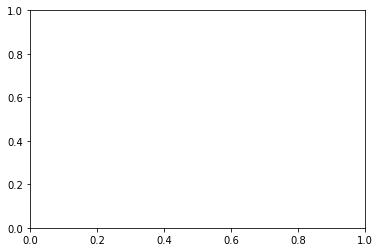

In [ ]:
# Confusion Metrics Plot
import itertools

figsize=(10, 10)

# create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# pretify cm
#fig, ax = plt.subplot(figsize=(10, 10))
fig, ax = plt.subplot()

# create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

# set threshold
threshold = (cm.max() + cmmin()) / 2.

# plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)



## Working with Multiclass Classification

When more than two classes it is multiclass classification
